In [ ]:
!pip install nilearn

     |████████████████████████████████| 3.1MB 7.7MB/s 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os.path
import random
import joblib
import matplotlib.pyplot as plt
from nilearn import image, plotting, datasets, decomposition, input_data
from nilearn.connectome import ConnectivityMeasure
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import LinearSVC
from nilearn.plotting import show
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, precision_score, roc_auc_score
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image, plotting

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
#Fixing seed for reproducibility
np.random.seed(0)

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [ ]:
#Loading data
num = 40
adhd_data = datasets.fetch_adhd(n_subjects=40)
#Getting the functional files
func = adhd_data.func


Dataset created in /root/nilearn_data/adhd



 ...done. (0 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/74a52d3552145e11365bb68453d1a70c/adhd40_metadata.tgz..... done.


Downloaded 21618688 of 44414948 bytes (48.7%,    1.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010042.tgz..... done.


Downloaded 19832832 of 45583539 bytes (43.5%,    1.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010064.tgz..... done.


Downloaded 22659072 of 45461055 bytes (49.8%,    1.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0010128.tgz..... done.


Downloaded 20430848 of 46216320 bytes (44.2%,    1.3s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0021019.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0023008.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0023012.tgz..... done.


Downloaded 54378496 of 72402326 bytes (75.1%,    0.7s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027011.tgz..... done.


Downloaded 52019200 of 76184603 bytes (68.3%,    0.9s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027018.tgz..... done.


Downloaded 42213376 of 70074120 bytes (60.2%,    1.3s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027034.tgz..... done.


Downloaded 50446336 of 69291635 bytes (72.8%,    0.7s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_0027037.tgz..... done.


Downloaded 19644416 of 41803342 bytes (47.0%,    1.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1019436.tgz..... done.


Downloaded 19775488 of 20763649 bytes (95.2%,    0.1s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1206380.tgz..... done.


Downloaded 19841024 of 20168043 bytes (98.4%,    0.0s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1418396.tgz..... done.


Downloaded 53067776 of 62682233 bytes (84.7%,    0.4s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1517058.tgz..... done.


Downloaded 19513344 of 20196558 bytes (96.6%,    0.0s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1552181.tgz..... done.


Downloaded 51101696 of 60663491 bytes (84.2%,    0.4s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1562298.tgz..... done.


 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_1679142.tgz..... done.


Downloaded 20201472 of 33119052 bytes (61.0%,    0.6s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2014113.tgz..... done.


Downloaded 19120128 of 45455025 bytes (42.1%,    1.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2497695.tgz..... done.


Downloaded 46653440 of 57992968 bytes (80.4%,    0.5s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_2950754.tgz..... done.


Downloaded 52076544 of 67925261 bytes (76.7%,    0.6s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3007585.tgz..... done.


Downloaded 21250048 of 32919780 bytes (64.6%,    0.5s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3154996.tgz..... done.


Downloaded 50708480 of 59835286 bytes (84.7%,    0.4s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3205761.tgz..... done.


Downloaded 56344576 of 61857076 bytes (91.1%,    0.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3520880.tgz..... done.


Downloaded 51101696 of 59385206 bytes (86.1%,    0.3s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3624598.tgz..... done.


Downloaded 22134784 of 41518251 bytes (53.3%,    0.9s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3699991.tgz..... done.


Downloaded 21168128 of 32108848 bytes (65.9%,    0.5s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3884955.tgz..... done.


Downloaded 20455424 of 39415752 bytes (51.9%,    1.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3902469.tgz..... done.


Downloaded 54247424 of 59297020 bytes (91.5%,    0.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_3994098.tgz..... done.


Downloaded 16498688 of 20157314 bytes (81.8%,    0.2s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4016887.tgz..... done.


Downloaded 19644416 of 21375806 bytes (91.9%,    0.1s remaining) ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4046678.tgz..... done.


Downloaded 53518336 of 69914913 bytes (76.5%,    0.6s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4134561.tgz..... done.


Downloaded 18989056 of 45506732 bytes (41.7%,    1.4s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4164316.tgz..... done.


Downloaded 17874944 of 32363673 bytes (55.2%,    0.8s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_4275075.tgz..... done.


Downloaded 49815552 of 73484949 bytes (67.8%,    1.0s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_6115230.tgz..... done.


Downloaded 19775488 of 42188959 bytes (46.9%,    1.1s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_7774305.tgz..... done.


Downloaded 56082432 of 70396354 bytes (79.7%,    0.5s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_8409791.tgz..... done.


Downloaded 20070400 of 45075978 bytes (44.5%,    1.3s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_8697774.tgz..... done.


Downloaded 53985280 of 63380505 bytes (85.2%,    0.3s remaining) ...done. (3 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_9744150.tgz..... done.


Downloaded 18857984 of 46607053 bytes (40.5%,    1.5s remaining) ...done. (2 seconds, 0 min)
Extracting data from /root/nilearn_data/adhd/166bfb3ae13f7c60c012aa2194eef088/adhd40_9750701.tgz..... done.


In [ ]:
len(func)

40

In [ ]:
#Using nilearn's individual component analysis for group level
canica = decomposition.CanICA(n_components=20, mask_strategy='background')
canica.fit(func)

CanICA(detrend=True, do_cca=True, high_pass=None, low_pass=None, mask=None,
       mask_args=None, mask_strategy='background', memory=Memory(location=None),
       memory_level=0, n_components=20, n_init=10, n_jobs=1, random_state=None,
       smoothing_fwhm=6, standardize=True, standardize_confounds=True, t_r=None,
       target_affine=None, target_shape=None, threshold='auto', verbose=0)

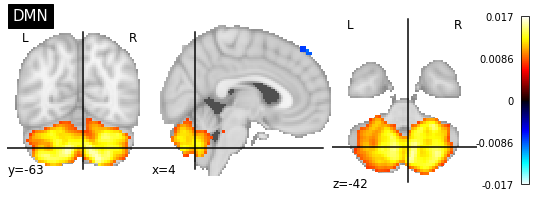

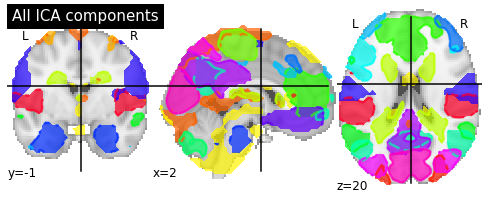

In [ ]:
#Retrieving the components
components = canica.components_

#Using a masker to project into the 3D space
components_img = canica.masker_.inverse_transform(components)

#Plotting the default mode network (DMN) without region extraction
plotting.plot_stat_map(image.index_img(components_img, 9), title='DMN')
plotting.show()

#Plotting all the components
plotting.plot_prob_atlas(components_img, title='All ICA components')
plotting.show()

In [ ]:
#Using a filter to extract the regions time series
masker = input_data.NiftiMapsMasker(components_img, smoothing_fwhm=6,
                         standardize=False, detrend=True,
                         t_r=2.5, low_pass=0.1,
                         high_pass=0.01)



#Computing the regions signals and extracting the phenotypic information of interest
subjects = []
adhds = []
sites = []
labels = []
for func_file, confound_file, phenotypic in zip(
        adhd_data.func, adhd_data.confounds, adhd_data.phenotypic):
    time_series = masker.fit_transform(func_file, confounds=confound_file)
    subjects.append(time_series)
    is_adhd = phenotypic['adhd']
    if is_adhd == 1:
        adhds.append(time_series)
    sites.append(phenotypic['site'])
    labels.append(phenotypic['adhd'])

In [ ]:
#Comparing the three types of functional connectivity between the regions of interest
connectivity_biomarkers = {}
kinds = ['correlation', 'partial correlation', 'tangent']
for kind in kinds:
    conn_measure = ConnectivityMeasure(kind=kind, vectorize=True)
    connectivity_biomarkers[kind] = conn_measure.fit_transform(subjects)

# For each kind, all individual coefficients are stacked in a unique 2D matrix.
print('{0} correlation biomarkers for each subject.'.format(
    connectivity_biomarkers['tangent'].shape[1]))

210 correlation biomarkers for each subject.


In [ ]:
#Stratifying the data to use for comparison
classes = ['{0}{1}'.format(site_name, adhd_label)
           for site_name, adhd_label in zip(sites, labels)]
cv = StratifiedKFold(n_splits=3)

In [ ]:
#Classifying using the connectivity coefficients and linear support vector
mean_scores = []
for kind in kinds:
    svc = LinearSVC(random_state=0)
    cv_scores = cross_val_score(svc,
                                connectivity_biomarkers[kind],
                                y=labels,
                                cv=cv,
                                groups=labels,
                                scoring='accuracy',
                                )
    mean_scores.append(cv_scores.mean())

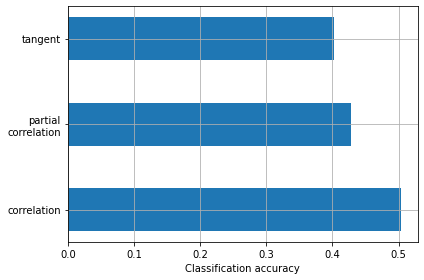

In [ ]:
#Visualizing results and accuracy
plt.figure(figsize=(6, 4))
positions = np.arange(len(kinds)) * .1 + .1
plt.barh(positions, mean_scores, align='center', height=.05)
yticks = [kind.replace(' ', '\n') for kind in kinds]
plt.yticks(positions, yticks)
plt.xlabel('Classification accuracy')
plt.grid(True)
plt.tight_layout()

show()

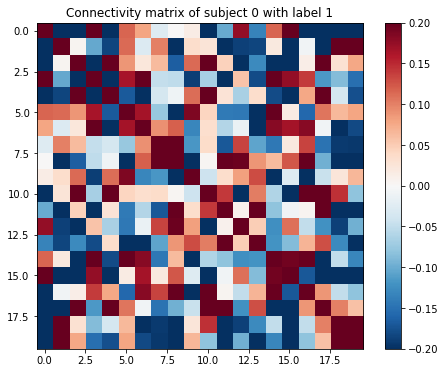

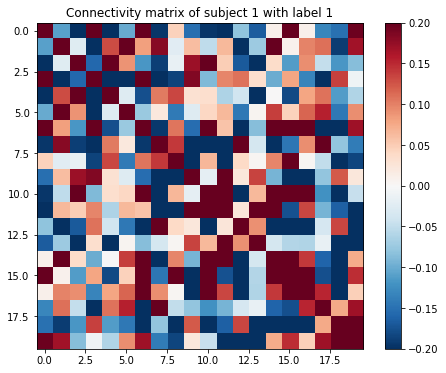

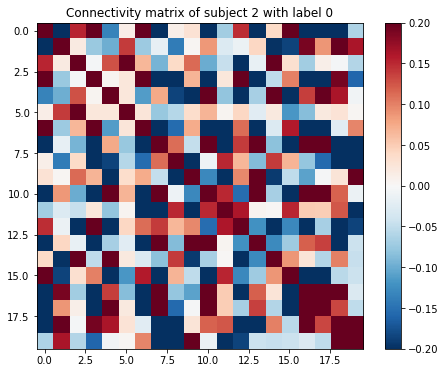

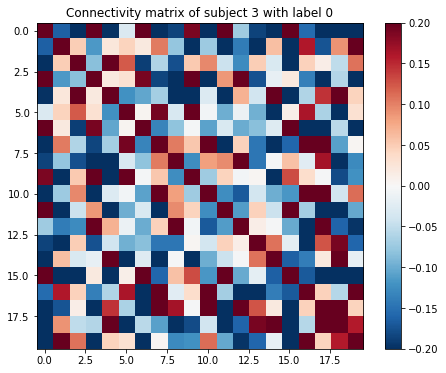

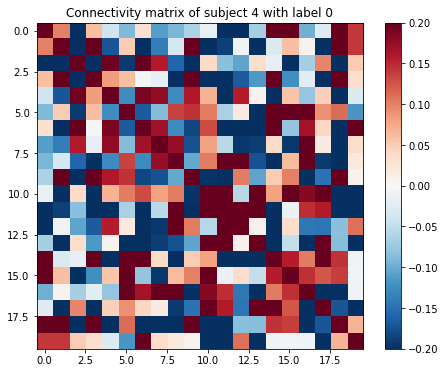

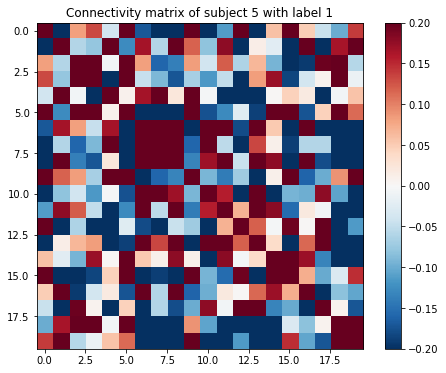

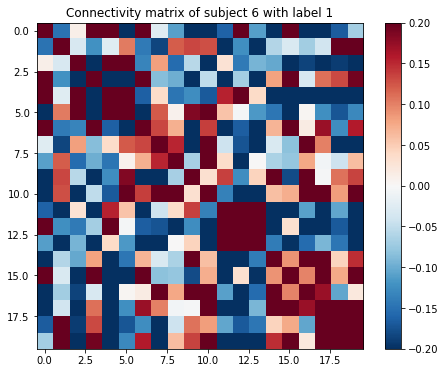

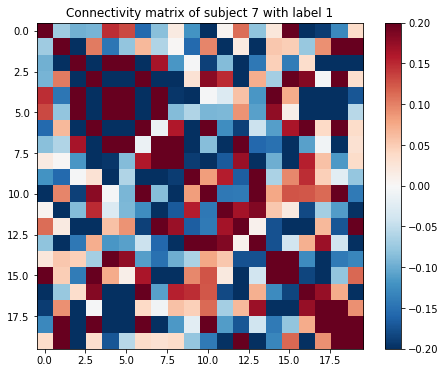

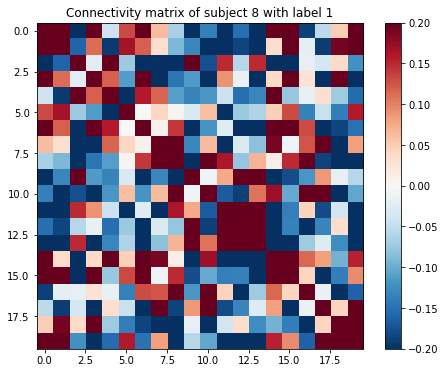

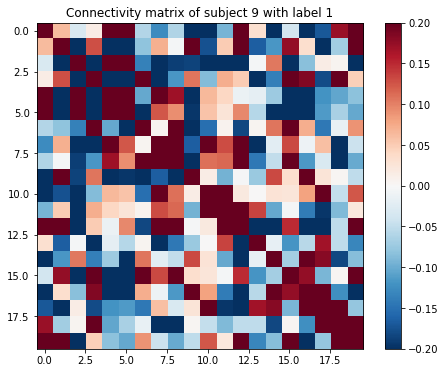

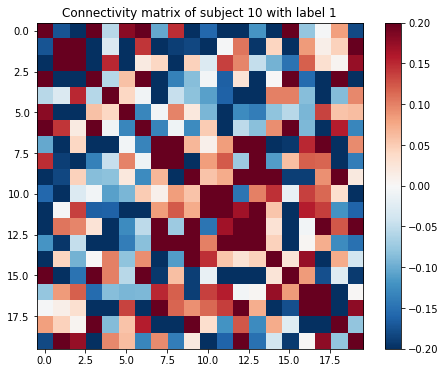

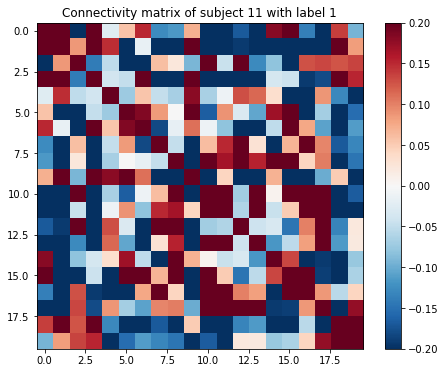

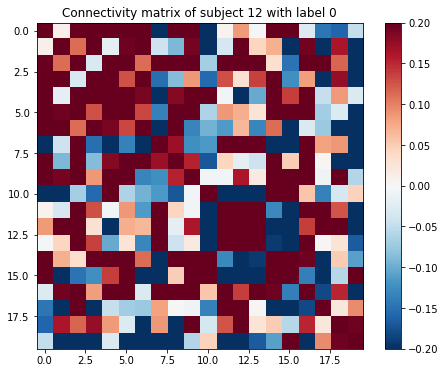

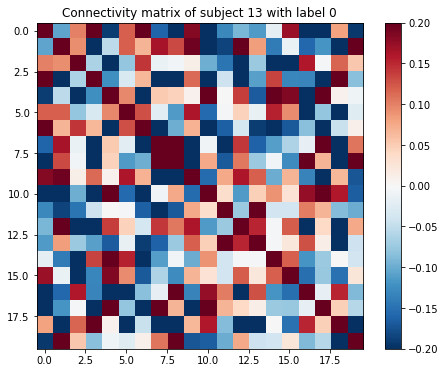

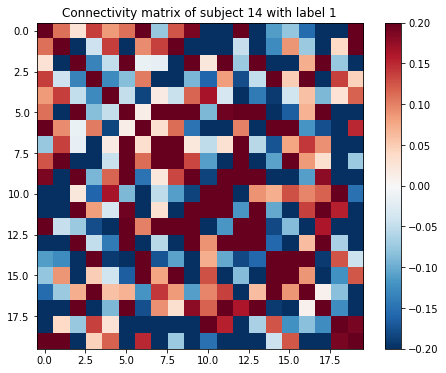

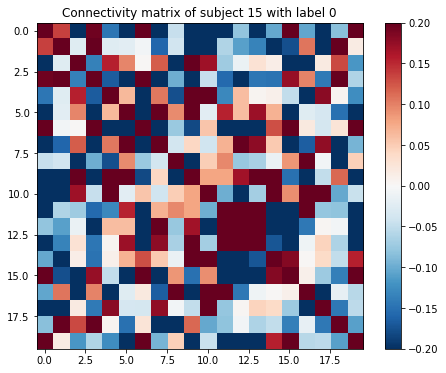

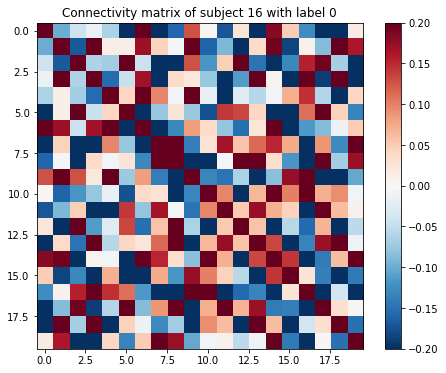

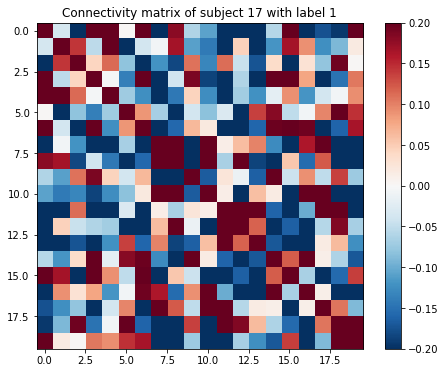

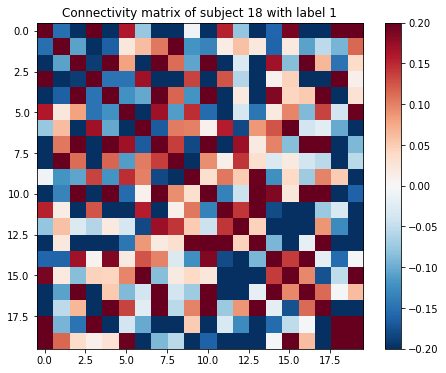

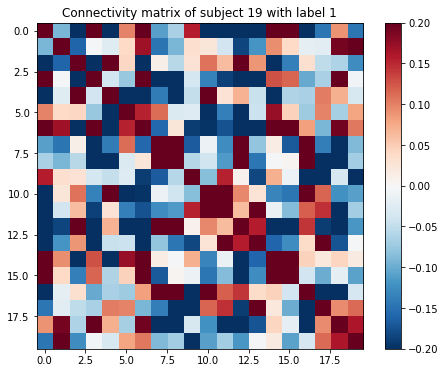

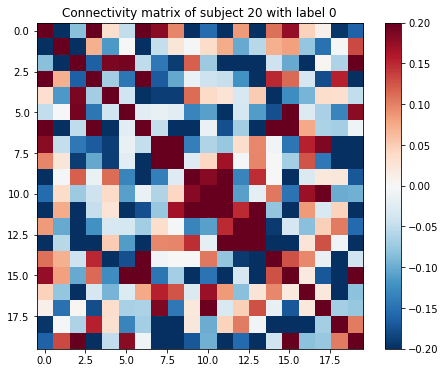

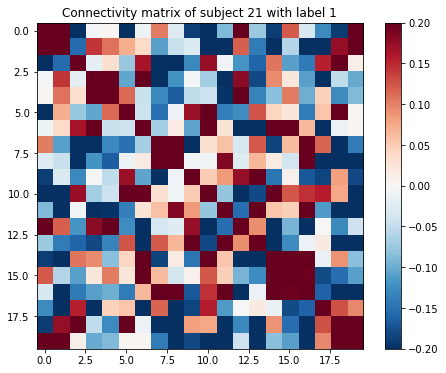

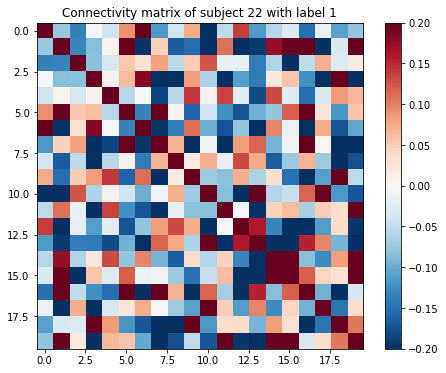

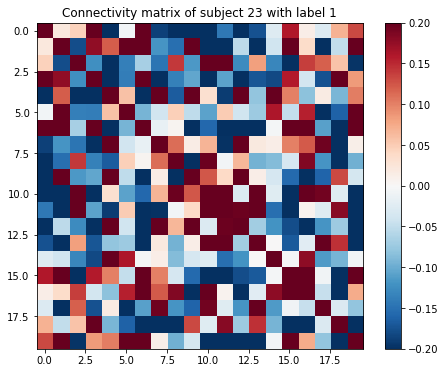

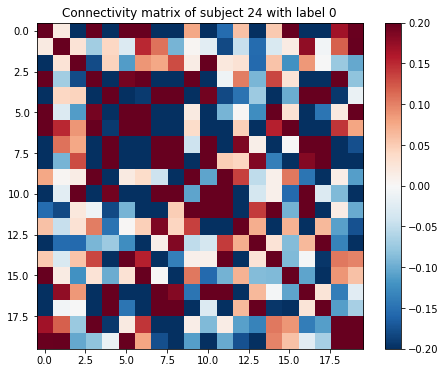

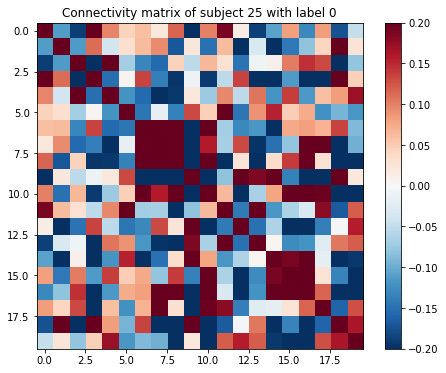

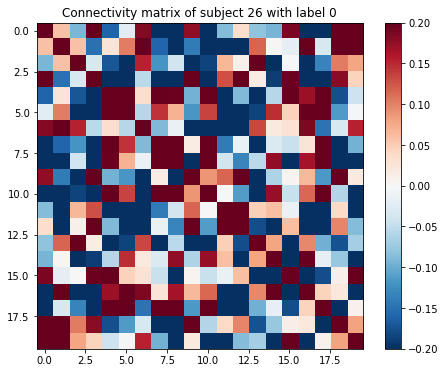

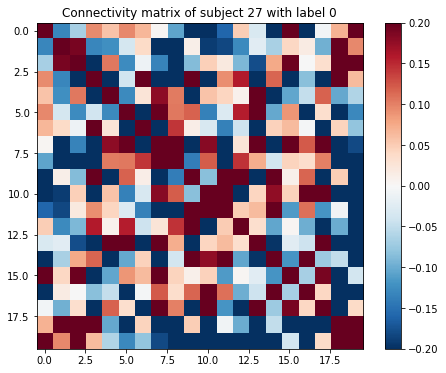

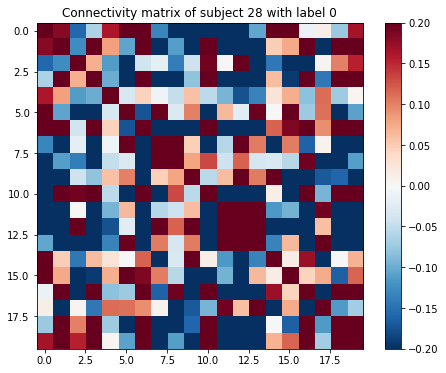

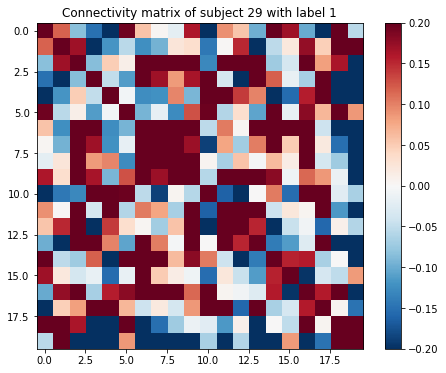

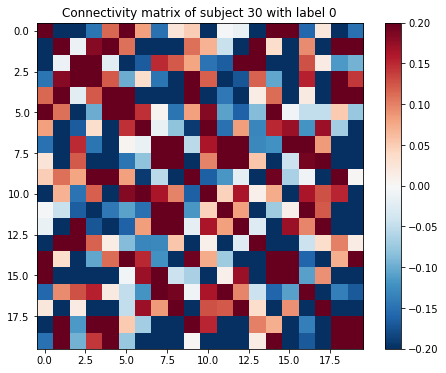

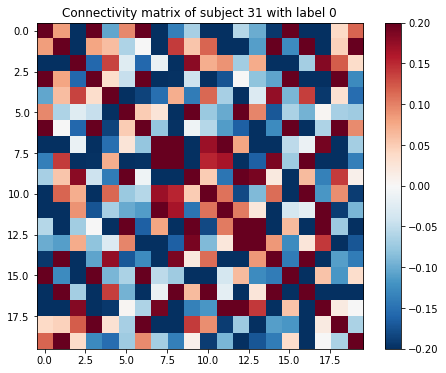

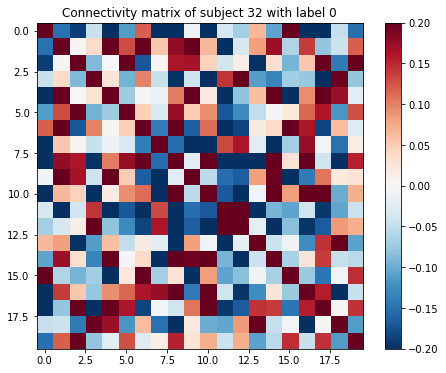

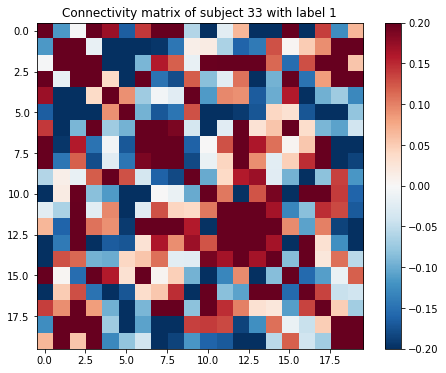

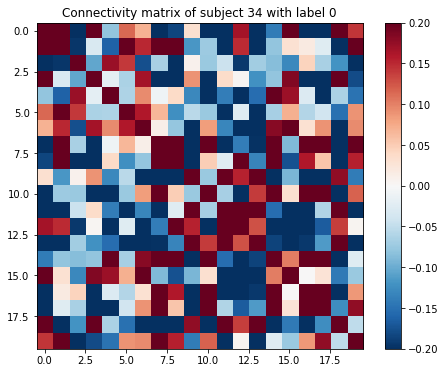

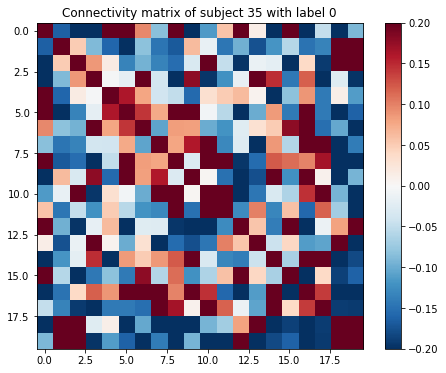

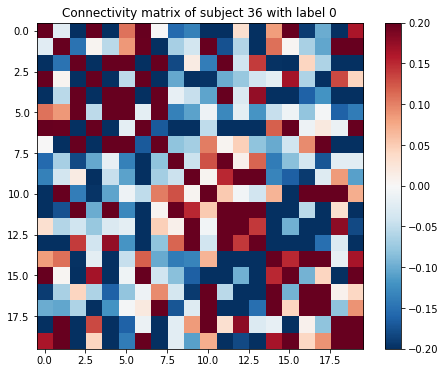

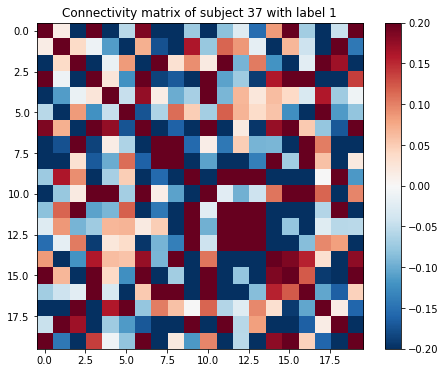

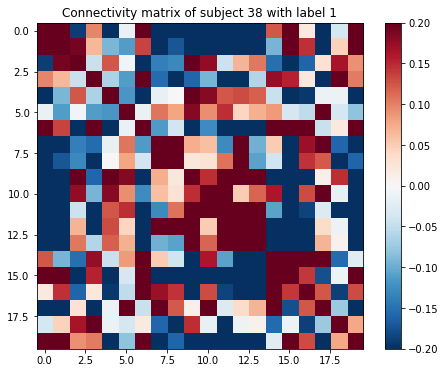

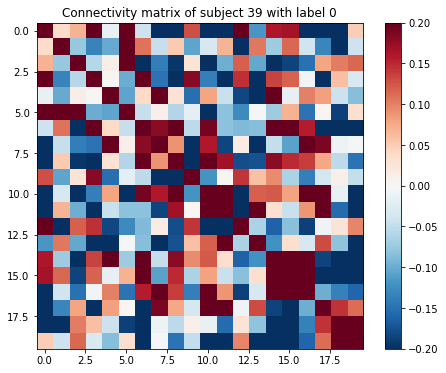

In [ ]:
#Displaying the connectomes for the most accurate kind of functional connectivity
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrices = correlation_measure.fit_transform(subjects)

for i in range(40):
    plt.figure(figsize=(8,6))
    plt.imshow(correlation_matrices[i], vmax=.20, vmin=-.20, cmap='RdBu_r')
    plt.colorbar()
    plt.title('Connectivity matrix of subject {} with label {}'.format(i, labels[i]))

In [ ]:
#Separating the correlation matrices between treatment and control subjects
adhd_correlations = []
control_correlations = []
for i in range(40):
    if labels[i] == 1:
        adhd_correlations.append(correlation_matrices[i])
    else:
        control_correlations.append(correlation_matrices[i])

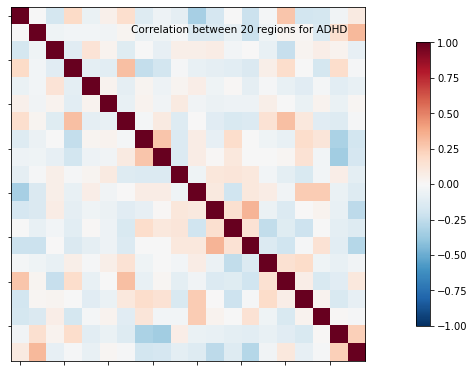

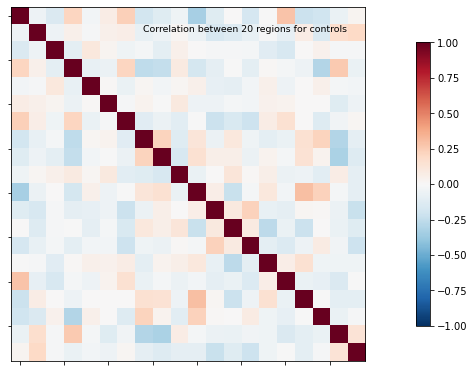

In [ ]:
#Getting the mean correlation matrix across all treatment subjects
mean_correlations_adhd = np.mean(adhd_correlations, axis=0).reshape(time_series.shape[-1],
                                                          time_series.shape[-1])

#Getting the mean correlation matrix across all control subjects
mean_correlations_control = np.mean(control_correlations, axis=0).reshape(time_series.shape[-1], time_series.shape[-1])

#Visualizing the mean correlation
plotting.plot_matrix(mean_correlations_adhd, vmax=1, vmin=-1,
                               colorbar=True, title='Correlation between 20 regions for ADHD')

plotting.plot_matrix(mean_correlations_control, vmax=1, vmin=-1, colorbar=True, title='Correlation between 20 regions for controls')

#Getting the center coordinates from the component decomposition to use as atlas labels
coords = plotting.find_probabilistic_atlas_cut_coords(components_img)

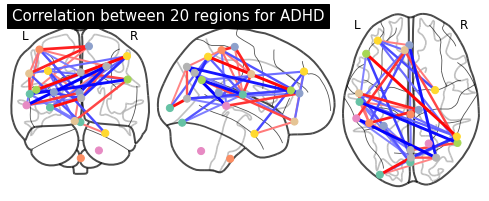

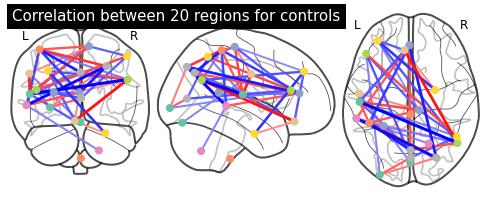

In [ ]:
#Plotting the connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlations_adhd, coords, edge_threshold="80%", title='Correlation between 20 regions for ADHD')

plotting.plot_connectome(mean_correlations_control, coords, edge_threshold="80%", title='Correlation between 20 regions for controls')
#plotting.show()

In [ ]:
#Creating the equivalent interactive visualization
view = plotting.view_connectome(mean_correlations_adhd, coords, edge_threshold='80%')
view

In [ ]:
view = plotting.view_connectome(mean_correlations_control, coords, edge_threshold='80%')
view

In [ ]:
df = pd.DataFrame(adhd_data['phenotypic'])

i = list(df.columns.values)
df[i[0]] = df[i[0]].str.decode(encoding = 'ASCII')
df[i[0]] = df[i[0]].replace('\"','',regex=True)

df[i[2]] = df[i[2]].str.decode(encoding = 'UTF-8')
df[i[2]] = df[i[2]].replace('\"','',regex=True)

for x in range(10, 13):

  df[i[x]] = df[i[x]].str.decode(encoding = 'ASCII')
  df[i[x]] = df[i[x]].replace('\"','',regex=True)



for x in range(14, 21):

  df[i[x]] = df[i[x]].str.decode(encoding = 'ASCII')
  df[i[x]] = df[i[x]].replace('\"','',regex=True)


for x in range(23, 65):

  df[i[x]] = df[i[x]].str.decode(encoding = 'ASCII')
  df[i[x]] = df[i[x]].replace('\"','',regex=True)
df

f0  Subject  ... defacing_ok                     defacing_notes
0   21    10042  ...                                               
1   19    10064  ...                                               
2   22    10128  ...                                               
3   20    21019  ...         yes                                   
4   30    23008  ...         yes                                   
5   27    23012  ...                                               
6   15    27011  ...                                               
7   11    27018  ...                                               
8    9    27034  ...                                               
9   13    27037  ...                                               
10   5  1019436  ...         yes                                   
11  29  1206380  ...         yes                                   
12  32  1418396  ...                                               
13  36  1517058  ...                                               
14  25  1552181  ...                                               
15  38  1562298  ...                                               
16  28  1679142  ...         yes                                   
17   1  2014113  ...         yes                                   
18  23  2497695  ...         yes                                   
19  33  2950754  ...         yes                                   
20  16  3007585  ...                                               
21   7  3154996  ...                                               
22  39  3205761  ...                                               
23  35  3520880  ...                                               
24  40  3624598  ...                                               
25   6  3699991  ...                                               
26   8  3884955  ...                                               
27   2  3902469  ...                                               
28  34  3994098  ...         yes                                   
29  31  4016887  ...                                               
30  26  4046678  ...                                               
31  10  4134561  ...         yes                                   
32  24  4164316  ...         yes                                   
33   3  4275075  ...                                               
34  12  6115230  ...         yes   deface front part of skull/brain
35   4  7774305  ...         yes  defaced part of front skull/brain
36  14  8409791  ...         yes                                   
37  17  8697774  ...                                               
38  37  9744150  ...                                               
39  18  9750701  ...         yes                                   

[40 rows x 65 columns]

In [ ]:
df.isin(['NA','NaN','  '])
df.isin(['NA','NaN','  ']).mean()
df = df.loc[:, df.isin(['NA','NaN','  ']).mean() < .6]
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(thresh=df.shape[0]*0.6, axis=1, inplace=True)
#df.drop(["full_4_iq", "handedness"], inplace = True)
#df.drop(21, inplace = True)
# df['RestScan'] = df['RestScan'].rank(method='dense')
# df[['site']] = df[['site']].stack().rank(method='dense').unstack()
# df[['data_set']] = df[['data_set']].stack().rank(method='dense').unstack()
# df[['sex']] = df[['sex']].stack().rank(method='dense').unstack()
# df[['sess_1_rest_1']] = df[['sess_1_rest_1']].stack().rank(method='dense').unstack()
# df[['sess_1_anat_1']] = df[['sess_1_anat_1']].stack().rank(method='dense').unstack()
# df['f0'] = pd.to_numeric(df['f0'],errors = 'coerce')
# df = df.astype({"RestScan":'int', "site":'int', "data_set":'int', "sex":'int', "sess_1_rest_1":'int', "sess_1_anat_1":'int'})
# df = df.astype({ "site": 'int', "data_set": 'int', "sex": 'int', "sess_1_rest_1": 'int', "sess_1_anat_1": 'int'})
df

f0  Subject  RestScan  MeanFD  ...  tdc  adhd  sess_1_rest_1  sess_1_anat_1
0   21    10042         1  0.0559  ...    0     1              1              1
1   19    10064         1  0.0623  ...    0     1              1              1
2   22    10128         1  0.0689  ...    1     0              1              1
3   20    21019         1  0.0575  ...    1     0              1              1
4   30    23008         1  0.0801  ...    1     0              1              1
5   27    23012         1  0.0569  ...    0     1              1              1
6   15    27011         1  0.1212  ...    0     1              1              1
7   11    27018         1  0.0622  ...    0     1              1              1
8    9    27034         1  0.0484  ...    0     1              1              1
9   13    27037         1  0.0686  ...    0     1              1              1
10   5  1019436         1  0.0904  ...    0     1              1              1
11  29  1206380         1  0.0719  ...    0     1              1              1
12  32  1418396         1  0.0713  ...    1     0              1              1
13  36  1517058         1  0.0733  ...    1     0              1              1
14  25  1552181         1  0.0408  ...    0     1              1              1
15  38  1562298         1  0.0722  ...    1     0              1              1
16  28  1679142         1  0.1482  ...    1     0              1              1
17   1  2014113         1  0.0576  ...    0     1              1              1
18  23  2497695         1  0.0482  ...    0     1              1              1
19  33  2950754         1  0.0523  ...    0     1              1              1
20  16  3007585         1  0.0528  ...    1     0              1              1
22  39  3205761         1  0.0679  ...    0     1              1              1
23  35  3520880         1  0.0509  ...    0     1              1              1
24  40  3624598         1  0.0653  ...    1     0              1              1
25   6  3699991         1  0.1113  ...    1     0              1              1
26   8  3884955         1  0.0988  ...    1     0              1              1
27   2  3902469         1  0.0580  ...    1     0              1              1
28  34  3994098         1  0.0547  ...    1     0              1              1
29  31  4016887         1  0.0879  ...    0     1              1              1
30  26  4046678         1  0.1139  ...    1     0              1              1
31  10  4134561         1  0.0439  ...    1     0              1              1
32  24  4164316         1  0.0774  ...    1     0              1              1
33   3  4275075         1  0.0789  ...    0     1              1              1
34  12  6115230         1  0.0539  ...    1     0              1              1
35   4  7774305         1  0.0679  ...    1     0              1              1
36  14  8409791         1  0.0567  ...    1     0              1              1
37  17  8697774         1  0.0527  ...    0     1              1              1
38  37  9744150         1  0.0547  ...    0     1              1              1
39  18  9750701         1  0.0654  ...    1     0              1              1

[39 rows x 18 columns]

In [ ]:
df.isna().sum()

f0                            0
Subject                       0
RestScan                      0
MeanFD                        0
NumFD_greater_than_020        0
rootMeanSquareFD              0
FDquartiletop14thFD           0
PercentFD_greater_than_020    0
MeanDVARS                     0
MeanFD_Jenkinson              0
site                          0
data_set                      0
age                           0
sex                           0
tdc                           0
adhd                          0
sess_1_rest_1                 0
sess_1_anat_1                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 39
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   f0                          39 non-null     int64  
 1   Subject                     39 non-null     int64  
 2   RestScan                    39 non-null     int64  
 3   MeanFD                      39 non-null     float64
 4   NumFD_greater_than_020      39 non-null     int64  
 5   rootMeanSquareFD            39 non-null     float64
 6   FDquartiletop14thFD         39 non-null     float64
 7   PercentFD_greater_than_020  39 non-null     float64
 8   MeanDVARS                   39 non-null     float64
 9   MeanFD_Jenkinson            39 non-null     float64
 10  site                        39 non-null     int64  
 11  data_set                    39 non-null     int64  
 12  age                         39 non-null     float64
 13  sex                         39 non-nu

In [ ]:
df.describe()

f0       Subject  ...  sess_1_rest_1  sess_1_anat_1
count  39.000000  3.900000e+01  ...           39.0           39.0
mean   20.846154  3.015196e+06  ...            1.0            1.0
std    11.633750  2.824707e+06  ...            0.0            0.0
min     1.000000  1.004200e+04  ...            1.0            1.0
25%    11.500000  5.232365e+05  ...            1.0            1.0
50%    21.000000  2.950754e+06  ...            1.0            1.0
75%    30.500000  4.031782e+06  ...            1.0            1.0
max    40.000000  9.750701e+06  ...            1.0            1.0

[8 rows x 18 columns]

In [ ]:
X1 = connectivity_biomarkers['correlation']
X1 = StandardScaler().fit_transform(X1)
y1 = np.array(labels)
y1 = y1.reshape(-1, 1)
y1 = OneHotEncoder().fit_transform(y1).toarray()

In [ ]:
#Splitting data into training and testing
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
#To distibute dataframe into x and y columns
y2 = df.iloc[:,df.columns.get_loc('adhd')].values

#To scale and fit dataframe into x functions
minmaxscale = preprocessing.MinMaxScaler(feature_range=(0,1))
X2 = minmaxscale.fit_transform(df.drop('adhd', 1))

#x = temp.iloc[:,:].values
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=0)

In [ ]:
X = list(zip(X1, X2))
y = list(zip(y1, y2))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [ ]:
X_train_mri, X_train_phenotypic = zip(*x_train)
y_train_mri, y_train_phenotypic = zip(*y_train)
X_test_mri, X_test_phenotypic = zip(*x_test)
y_test_mri, y_test_phenotypic = zip(*y_test)
X_train_mri = np.array(X_train_mri)
y_train_mri = np.array(y_train_mri)
X_test_mri = np.array(X_test_mri)
y_test_mri = np.array(y_test_mri)
X_train_phenotypic = np.array(X_train_phenotypic)
y_train_phenotypic = np.array(y_train_phenotypic)
X_test_phenotypic = np.array(X_test_phenotypic)
y_test_phenotypic = np.array(y_test_phenotypic)

In [ ]:
#use this cell to test the values
len(X_train_phenotypic)

27

In [ ]:
#Function to display confusion matrix
def display_confussion(name,y_pred, y_test):
  c_m = confusion_matrix(y_test, y_pred)
  ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
  plt.colorbar(ax)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(name)
  plt.show()
  print("Accuracy Achieved for " +name+ ": ",accuracy_score(y_test, y_pred)*100," %" )
  #zero_division=0 to suppress warning for low count of DX=2 in our dataframe
  print(classification_report(y_test,y_pred, zero_division=0))
  print()

In [ ]:
# Neural network
model = Sequential()
layers = len(X_train_mri[0])
layers = int(layers/2)
model.add(Dense(layers, input_dim=len(X_train_mri[0]), activation='relu'))
print('Added hidden layer of dimention:',layers)
while layers>4:
  layers = int(layers/2)
  print('Added hidden layer of dimention:',layers)
  model.add(Dense(layers, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_mri, y_train_mri, epochs=100)

In [ ]:
ann_pred = model.predict(X_test_mri)
#Converting predictions to label
pred = list()
for i in range(len(ann_pred)):
    pred.append(np.argmax(ann_pred[i]))
#Converting one hot encoded test label to label
#test = list()
#for i in range(len(y_test_mri)):
#    test.append(np.argmax(y_test_mri[i]))
from sklearn.metrics import accuracy_score
print('Accuracy is:', accuracy_score(pred,y_test_phenotypic)*100)

In [ ]:
def find_best_nn_mri(no_of_iterations):
  best_accuracy=0
  for i in range(no_of_iterations):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)
    X_train_mri, X_train_phenotypic = zip(*x_train)
    y_train_mri, y_train_phenotypic = zip(*y_train)
    X_test_mri, X_test_phenotypic = zip(*x_test)
    y_test_mri, y_test_phenotypic = zip(*y_test)
    X_train_mri = np.array(X_train_mri)
    y_train_mri = np.array(y_train_mri)
    X_test_mri = np.array(X_test_mri)
    y_test_mri = np.array(y_test_mri)
    X_train_phenotypic = np.array(X_train_phenotypic)
    y_train_phenotypic = np.array(y_train_phenotypic)
    X_test_phenotypic = np.array(X_test_phenotypic)
    y_test_phenotypic = np.array(y_test_phenotypic)
    if len(np.unique(y_test_phenotypic)) !=2:
      continue;
    # Neural network
    model = Sequential()
    layers = len(X_train_mri[0])
    layers = int(layers/2)
    model.add(Dense(layers, input_dim=len(X_train_mri[0]), activation='relu'))
    print('Added hidden layer of dimention: ',layers)
    while layers>4:
      layers = int(layers/2)
      print('Added hidden layer of dimention: ',layers)
      model.add(Dense(layers, activation='relu'))
    #model.add(Dense(3, activation='relu'))
    #print('Added hidden layer of dimention: 3')
    model.add(Dense(2, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_mri, y_train_mri, epochs=100)
    ann_pred = model.predict(X_test_mri)
    #Converting predictions to label
    pred = list()
    for i in range(len(ann_pred)):
      pred.append(np.argmax(ann_pred[i]))
    #Converting one hot encoded test label to label
    #test = list()
    #for i in range(len(y_test_mri)):
      #test.append(np.argmax(y_test_mri[i]))
      from sklearn.metrics import accuracy_score, roc_auc_score
    accuracy = roc_auc_score(y_test_phenotypic, pred)*100
    if accuracy>best_accuracy:
      best_accuracy = accuracy
      best_x_train = x_train
      best_x_test = x_test
      best_y_train = y_train
      best_y_test = y_test
      best_pred = pred
  return best_x_train, best_x_test, best_y_train, best_y_test, best_pred

x_train, x_test, y_train, y_test, pred = find_best_nn_mri(100)
X_train_mri, X_train_phenotypic = zip(*x_train)
y_train_mri, y_train_phenotypic = zip(*y_train)
X_test_mri, X_test_phenotypic = zip(*x_test)
y_test_mri, y_test_phenotypic = zip(*y_test)
X_train_mri = np.array(X_train_mri)
y_train_mri = np.array(y_train_mri)
X_test_mri = np.array(X_test_mri)
y_test_mri = np.array(y_test_mri)
X_train_phenotypic = np.array(X_train_phenotypic)
y_train_phenotypic = np.array(y_train_phenotypic)
X_test_phenotypic = np.array(X_test_phenotypic)
y_test_phenotypic = np.array(y_test_phenotypic)

Streaming output truncated to the last 5000 lines.
Epoch 73/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3037 - accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3011 - accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3003 - accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 0s 7ms/step - loss: 0.3008 - accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 13ms/step - loss: 0.2991 - accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 15ms/step - loss: 0.2986 - accuracy: 1.0000
Epoch 79/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2977 - accuracy: 1.0000
Epoch 80/100
1/1 [==============================] - 0s 12ms/step - loss: 0.2965 - accuracy: 1.0000
Epoch 81/100
1/1 [==============================] - 0s 30ms/step - loss: 0.2964 - accuracy: 1.0000
Epoch 82/100
1/1 [==============================] - 0s 12ms/st

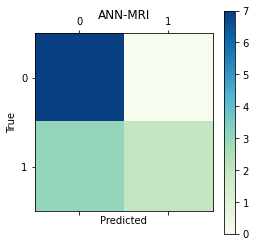

Accuracy Achieved for ANN-MRI:  75.0  %
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.40      0.57         5

    accuracy                           0.75        12
   macro avg       0.85      0.70      0.70        12
weighted avg       0.82      0.75      0.72        12




In [ ]:
display_confussion('ANN-MRI', y_pred=pred, y_test=y_test_phenotypic)

In [ ]:
#To find best parameters for SVM using Grid Search
parameters = [{'C':[1, 10, 100, 1000], 'gamma': [0.05, 0.1, 0.2,0.3, 0.5]}]
grid_search = GridSearchCV(SVC(kernel='rbf' ),  parameters,cv =5, n_jobs= -1)
grid_search.fit(X_train_phenotypic, np.ravel(y_train_phenotypic))

#To print best parameter after tuning
print(grid_search.best_params_)
#To print best estimator after tuning
print(grid_search.best_estimator_)

{'C': 1, 'gamma': 0.1}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
#To classify dataframe into SVM
classifier = SVC(C=100, kernel = 'rbf', gamma = 0.05 , random_state = 10)
classifier.fit(X_train_phenotypic, np.ravel(y_train_phenotypic))
if not os.path.exists("models/"):
  !mkdir models
joblib.dump(classifier, 'models/svm.pkl')

['models/svm.pkl']

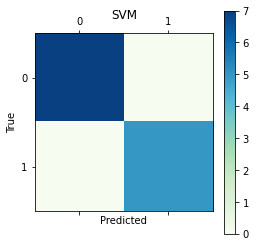

Accuracy Achieved for SVM:  100.0  %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         5

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12




In [ ]:
#To load SVM model from memory
SVM_model = joblib.load("models/svm.pkl")
SVM_predicted = SVM_model.predict(X_test_phenotypic)

#Displaying confusion matrix for SVM
display_confussion("SVM", y_pred=SVM_predicted, y_test=y_test_phenotypic)

In [ ]:
def make_pred(a, b, weight, threshold=0.5):
  weight = np.divide(weight, sum(weight))
  c = np.add(np.multiply(a, weight[0]), np.multiply(b, weight[1]))
  pred = []
  for val in c:
    if val>threshold:
      pred.append(1)
    else:
      pred.append(0)
  return pred

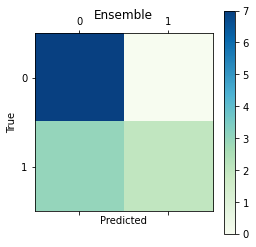

Accuracy Achieved for Ensemble:  75.0  %
              precision    recall  f1-score   support

           0       0.70      1.00      0.82         7
           1       1.00      0.40      0.57         5

    accuracy                           0.75        12
   macro avg       0.85      0.70      0.70        12
weighted avg       0.82      0.75      0.72        12




In [ ]:
weight = [1, 1]
ensemble_pred = make_pred(pred, SVM_predicted, weight=weight, threshold=0.5)
display_confussion('Ensemble', y_pred=ensemble_pred, y_test=y_test_phenotypic)

In [ ]:
#This is because the NN-MRI is accurate in predicting ADHD but not accurate enough to predict non-ADHD. Hence SVM is able to filter out non-ADHD and overall accuracy is 100%
[[i, j] for i, j in zip(pred, SVM_predicted)]

[[0, 0],
 [1, 1],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 0],
 [0, 1],
 [0, 1],
 [1, 1],
 [0, 0],
 [0, 1],
 [0, 0]]

In [ ]:
# exploring the header of one image
import nibabel as nib
img=nib.load(adhd_data['func'][0])
print(img.header['dim'])
print(img.header['pixdim'])


[  4  61  73  61 176   1   1   1]
[-1.  3.  3.  3.  2.  0.  0.  0.]


In [ ]:
#!pip install nilearn
# Let's see whether Nilearn is installed
try:
    import nilearn
except ImportError:
    # if not, install it using pip
    !pip install nilearn
from nilearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

#nilearn - neuroimaging tailored library
from nilearn.input_data import NiftiMapsMasker
from nilearn import plotting

#sklearn - basic ML tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn import metrics

#keras - for NN models
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras.layers import LSTM
from keras import optimizers
from keras.utils import plot_model
from keras import utils
from sklearn.metrics import roc_curve


#scipy- statistical analysis tools
from scipy.stats import ttest_1samp
from scipy import interp



In [ ]:
## load the smith (ICA based) mask
## 'rsn10': 10 ICA maps from the above that matched across task and rest
# http://brainmap.org/pubs/SmithPNAS09.pdf

smith_atlas = datasets.fetch_atlas_smith_2009()
smith_atlas_rs_networks = smith_atlas.rsn70



Dataset created in /root/nilearn_data/smith_2009



 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


Downloaded 28868608 of 53028809 bytes (54.4%,    0.8s remaining) ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


Downloaded 57942016 of 67017538 bytes (86.5%,    0.9s remaining) ...done. (6 seconds, 0 min)


In [ ]:
# Region signals extraction- exctract the values of the ten networks

masker = NiftiMapsMasker(maps_img=smith_atlas_rs_networks,  # Smith stals
                         standardize=True, # centers and norms the time-series
                         memory='nilearn_cache', # cache
                         verbose=0) #do not print verbose

In [ ]:
all_subjects_data=[]
labels=[]  # 1 if ADHD, 0 if control

for func_file, confound_file, phenotypic in zip(
        adhd_data.func, adhd_data.confounds, adhd_data.phenotypic):

    time_series = masker.fit_transform(func_file, confounds=confound_file)

    all_subjects_data.append(time_series)
    labels.append(phenotypic['adhd'])


In [ ]:
print('N control:' ,labels.count(0))
print('N adhd:' ,labels.count(1))

N control: 20
N adhd: 20


In [ ]:
# find the longest image
max_len_image=np.max([len(i) for i in all_subjects_data])


In [ ]:
# reshape

all_subjects_data_reshaped=[]
for subject_data in all_subjects_data:
  # Padding
  N= max_len_image-len(subject_data)
  padded_array=np.pad(subject_data, ((0, N), (0,0)),
                      'constant', constant_values=(0))
  subject_data=padded_array
  subject_data=np.array(subject_data)
  subject_data.reshape(subject_data.shape[0],subject_data.shape[1],1)
  all_subjects_data_reshaped.append(subject_data)


In [ ]:
# shape of data

# 40 subjects
# 261 time stamps
# 10 netwroks values

np.array(all_subjects_data_reshaped).shape

(40, 261, 70)

In [ ]:
# The data, split between train and test sets.

def get_train_test(X, y, i, verbrose=False):
  '''
  split to train and test and reshape data
  X data
  y labels
  i random state
  '''
  X_train, X_test, y_train, y_test = train_test_split(X,
                                        y, test_size=0.2, random_state=i)



  # Reshapes data to 4D for Hierarchical RNN.
  t_shape=np.array(all_subjects_data_reshaped).shape[1]
  RSN_shape=np.array(all_subjects_data_reshaped).shape[2]

  X_train = np.reshape(X_train, (len(X_train), t_shape, RSN_shape))
  X_test = np.reshape(X_test, (len(X_test), t_shape, RSN_shape))

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')

  if verbrose:
    print(X_train.shape[0], 'train samples')
    print(X_test.shape[0], 'test samples')

  # Converts class vectors to binary class matrices.
  y_train = utils.to_categorical(y_train, 2)
  y_test = utils.to_categorical(y_test, 2)

  return X_train, X_test, y_train, y_test



In [ ]:
# create the model

model = Sequential()

# LSTM layers -
# Long Short-Term Memory layer - Hochreiter 1997.
t_shape=np.array(all_subjects_data_reshaped).shape[1]
RSN_shape=np.array(all_subjects_data_reshaped).shape[2]

model.add(LSTM(units=70, # dimensionality of the output space
               dropout=0.4, # Fraction of the units to drop (inputs)
               recurrent_dropout=0.15, # Fraction of the units to drop (recurent state)
               return_sequences=True, # return the last state in addition to the output
               input_shape=(t_shape,RSN_shape)))

model.add(LSTM(units=60,
               dropout=0.4,
               recurrent_dropout=0.15,
               return_sequences=True))

model.add(LSTM(units=50,
               dropout=0.4,
               recurrent_dropout=0.15,
               return_sequences=True))

model.add(LSTM(units=40,
               dropout=0.4,
               recurrent_dropout=0.15,
               return_sequences=False))


model.add(Dense(units=2,
                activation="sigmoid"))

model.compile(loss='binary_crossentropy',
                optimizer=optimizers.Adam(lr=0.001),
                metrics=['binary_accuracy'])

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 261, 70)           39480     
                                                                 
 lstm_1 (LSTM)               (None, 261, 60)           31440     
                                                                 
 lstm_2 (LSTM)               (None, 261, 50)           22200     
                                                                 
 lstm_3 (LSTM)               (None, 40)                14560     
                                                                 
 dense (Dense)               (None, 2)                 82        
                                                                 
Total params: 107762 (420.95 KB)
Trainable params: 107762 (420.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


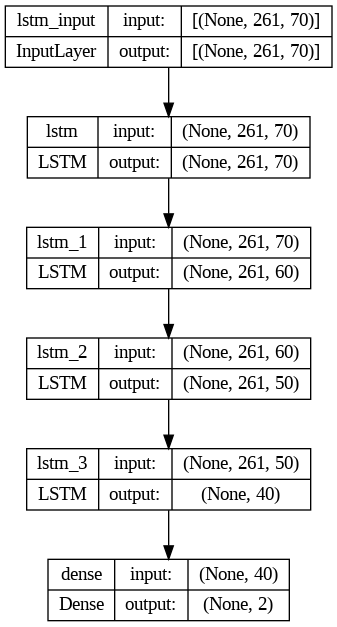

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)


32 train samples
8 test samples
Train on 25 samples, validate on 7 samples
Epoch 1/30
25/25 [==============================] - 2s 100ms/step - loss: 0.6885 - binary_accuracy: 0.5600 - val_loss: 0.6926 - val_binary_accuracy: 0.5714
Epoch 2/30
25/25 [==============================] - 1s 24ms/step - loss: 0.6929 - binary_accuracy: 0.5800 - val_loss: 0.6925 - val_binary_accuracy: 0.5714
Epoch 3/30
25/25 [==============================] - 1s 24ms/step - loss: 0.6929 - binary_accuracy: 0.5800 - val_loss: 0.6921 - val_binary_accuracy: 0.5714
Epoch 4/30
25/25 [==============================] - 1s 23ms/step - loss: 0.6881 - binary_accuracy: 0.6000 - val_loss: 0.6919 - val_binary_accuracy: 0.5714
Epoch 5/30
25/25 [==============================] - 1s 25ms/step - loss: 0.6813 - binary_accuracy: 0.6200 - val_loss: 0.6914 - val_binary_accuracy: 0.5714
Epoch 6/30
25/25 [==============================] - 1s 24ms/step - loss: 0.6774 - binary_accuracy: 0.6200 - val_loss: 0.6905 - val_binary_accuracy: 0

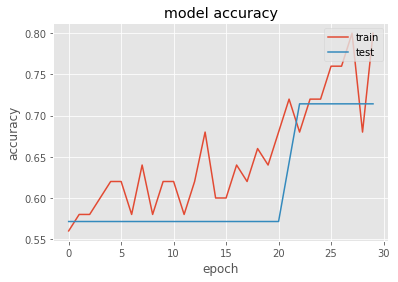

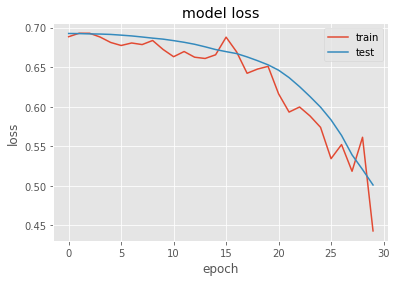

In [ ]:
X_train, X_test, y_train, y_test = get_train_test(all_subjects_data_reshaped,
                                                    labels, i=8, verbrose=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=30)

# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


32 train samples
8 test samples
Epoch 1/30
1/1 [==============================] - 20s 20s/step - loss: 0.6951 - binary_accuracy: 0.4000 - val_loss: 0.6982 - val_binary_accuracy: 0.4286
Epoch 2/30
1/1 [==============================] - 3s 3s/step - loss: 0.6920 - binary_accuracy: 0.6000 - val_loss: 0.6997 - val_binary_accuracy: 0.4286
Epoch 3/30
1/1 [==============================] - 3s 3s/step - loss: 0.6899 - binary_accuracy: 0.5800 - val_loss: 0.7013 - val_binary_accuracy: 0.4286
Epoch 4/30
1/1 [==============================] - 4s 4s/step - loss: 0.6831 - binary_accuracy: 0.6200 - val_loss: 0.7037 - val_binary_accuracy: 0.4286
Epoch 5/30
1/1 [==============================] - 3s 3s/step - loss: 0.6850 - binary_accuracy: 0.6000 - val_loss: 0.7066 - val_binary_accuracy: 0.4286
Epoch 6/30
1/1 [==============================] - 3s 3s/step - loss: 0.6753 - binary_accuracy: 0.6200 - val_loss: 0.7103 - val_binary_accuracy: 0.4286
Epoch 7/30
1/1 [==============================] - 4s 4s/step

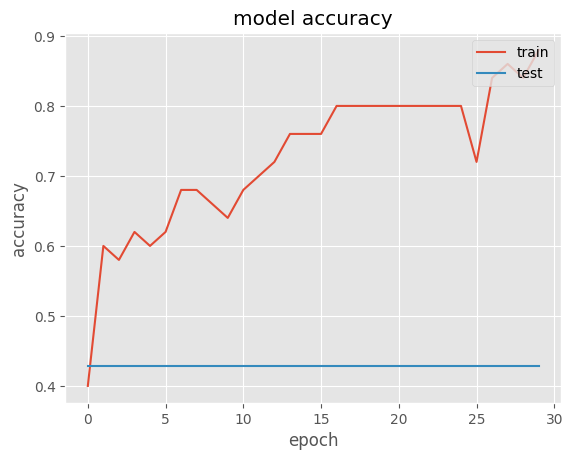

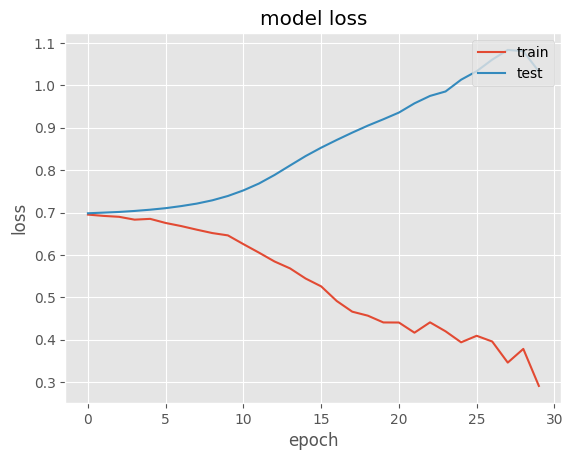

In [ ]:
X_train, X_test, y_train, y_test = get_train_test(all_subjects_data_reshaped,
                                                    labels, i=8, verbrose=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=30)

# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

def boostrapping_hypothesis_testing(X_train, y_train, X_test, y_test,
                                    n_iterations=100, n_epochs=50):

  '''
  hypothesis testing function
  X_train, y_train, X_test, y_test- the data
  n_iterations- number of bootdtaping iterations
  n_epochs - number of epochs for model's training
  '''

  accuracy=[] ## model accuracy
  roc_msrmnts_fpr=[] ## false positive rate
  roc_msrmnts_tpr=[] ## true positive rate

  # run bootstrap
  for i in range(n_iterations):
    # prepare train and test sets
    X_train, X_test, y_train, y_test=get_train_test(all_subjects_data_reshaped,
                                              labels, i=i, verbrose=False)
    # fit model
    print('fitting..')
    model.fit(X_train, y_train, validation_split=0.2, epochs=n_epochs)

    # evaluate model
    print('evaluating..')
    y_pred=model.predict(X_test)
    y_test_1d=[i[0] for i in y_test]
    y_pred_1d=[1.0 if i[0]>.5 else 0.0 for i in y_pred]

    fpr, tpr, _ = roc_curve(y_test_1d, y_pred_1d)

    acc_score = accuracy_score(y_test_1d, y_pred_1d)

    accuracy.append(acc_score)
    roc_msrmnts_fpr.append(fpr)
    roc_msrmnts_tpr.append(tpr)

  return accuracy, roc_msrmnts_fpr, roc_msrmnts_tpr



accuracy, roc_msrmnts_fpr, roc_msrmnts_tpr  = boostrapping_hypothesis_testing(X_train, y_train, X_test, y_test)

fitting..
Train on 25 samples, validate on 7 samples
Epoch 1/50
25/25 [==============================] - 1s 31ms/step - loss: 0.6721 - binary_accuracy: 0.5200 - val_loss: 0.6196 - val_binary_accuracy: 0.8571
Epoch 2/50
25/25 [==============================] - 1s 27ms/step - loss: 0.6737 - binary_accuracy: 0.4600 - val_loss: 0.6170 - val_binary_accuracy: 0.8571
Epoch 3/50
25/25 [==============================] - 1s 23ms/step - loss: 0.6482 - binary_accuracy: 0.6200 - val_loss: 0.6151 - val_binary_accuracy: 0.8571
Epoch 4/50
25/25 [==============================] - 1s 30ms/step - loss: 0.6489 - binary_accuracy: 0.5800 - val_loss: 0.6145 - val_binary_accuracy: 0.8571
Epoch 5/50
25/25 [==============================] - 1s 36ms/step - loss: 0.6650 - binary_accuracy: 0.6000 - val_loss: 0.6156 - val_binary_accuracy: 0.8571
Epoch 6/50
25/25 [==============================] - 1s 22ms/step - loss: 0.6448 - binary_accuracy: 0.6000 - val_loss: 0.6178 - val_binary_accuracy: 0.8571
Epoch 7/50
25/25 

In [ ]:
def calc_p_val(stats, h0, n_iterations):
  '''
  finds the p value for the results

  '''
  # calc pval
  tset, pval = ttest_1samp(stats, h0)

  return pval

p_val=calc_p_val(accuracy, .5)

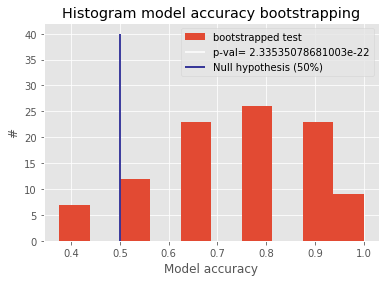

In [ ]:
def plot_p_value(stats, p_val):
  '''
  plots the bootstrapping results with the null hypothesis value
  '''

  plt.hist(stats, label='bootstrapped test')
  plt.vlines(.5, 0, 40, color='white', label='p-val= {}'.format(p_val))
  plt.vlines(.5, 0, 40, color='navy', label='Null hypothesis (50%)')

  plt.title('Histogram model accuracy bootstrapping')
  plt.xlabel('Model accuracy')
  plt.ylabel('#')
  plt.legend()
  plt.plot()

plot_p_value(accuracy, p_val)

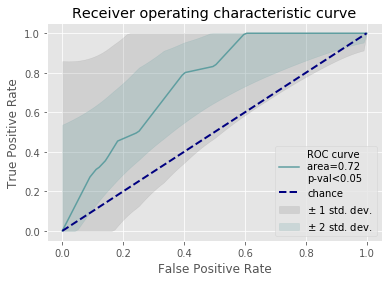

In [ ]:
def plot_roc_curve(fpr_vals, tpr_vals, roc_auc, p_val):
  '''
  This function plots the median value of the roc for the boostrapped
    results calculated above.

  fpr stand for false-positive rate
  tpr stands for true-positive rate
  roc_auc is the area under curve
  '''

  ## get the values
  N=len(fpr_vals)
  tprs=[]
  median_fpr=np.linspace(0, 1, 100)
  tprs=[interp(median_fpr, fpr_vals[i], tpr_vals[i]) for i in range(N)]
  std_tpr = np.std(tprs, axis=0)

  mean_tpr = np.mean(tprs, axis=0)
  median_tpr=np.median(tprs, axis=0)
  median_tpr[-1] = 1.0

  tprs_upper_2 = np.minimum(mean_tpr + 2*std_tpr, 1)
  tprs_lower_2 = np.maximum(mean_tpr - 2*std_tpr, 0)

  tprs_upper_1 = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower_1 = np.maximum(mean_tpr - std_tpr, 0)

  median_auc_roc=np.median(roc_auc)


  ## plot
  if p_val<0.05:
    p_val=0.05
  plt.plot(median_fpr, median_tpr, color='cadetblue',
           label='ROC curve \narea={} \np-val<{}'.\
            format(np.round(median_auc_roc,2),
                   np.round(p_val,2)))
  plt.fill_between(median_fpr, tprs_lower_2, tprs_upper_2, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

  plt.fill_between(median_fpr, tprs_lower_1, tprs_upper_1, color='cadetblue', alpha=.2,
                 label=r'$\pm$ 2 std. dev.')

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label=r'chance')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic curve')
  plt.legend(loc="lower right")

  plt.show()



plot_roc_curve(roc_msrmnts_fpr, roc_msrmnts_tpr, accuracy,p_val)